In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [71]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/new1.csv")


In [72]:
df.head()

,SNO,selduration
0,1,0.818
1,2,2.082
2,3,0.789
3,4,0.803
4,5,0.765


In [73]:
#summarize the data
df.describe()

,SNO,selduration
count,6023.000000,6023.000000
mean,3012.000000,0.780416
std,1738.834667,0.247818
min,1.000000,0.304000
25%,1506.500000,0.718000
50%,3012.000000,0.745000
75%,4517.500000,0.785000
max,6023.000000,4.797000


In [75]:
cdf = df[['SNO','selduration']]
cdf.head(5)

,SNO,selduration
0,1,0.818
1,2,2.082
2,3,0.789
3,4,0.803
4,5,0.765


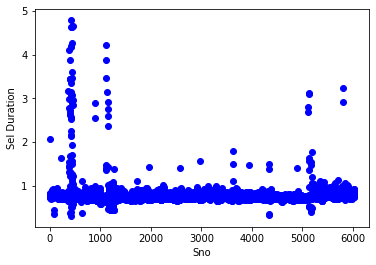

In [76]:
#graph of SNO vs r-r values

plt.scatter(cdf.SNO, cdf.selduration,color='blue')
plt.xlabel('Sno')
plt.ylabel('Sel Duration')
plt.show()

In [26]:
#splitting our data in 80-20 ratio

In [77]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

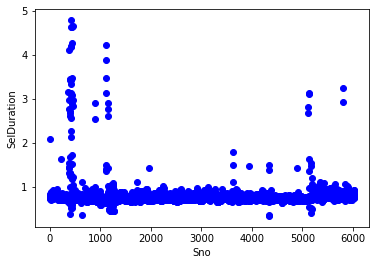

In [78]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.SNO, train.selduration,  color='blue')
plt.xlabel("Sno")
plt.ylabel("SelDuration")
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SNO']])
train_y = np.asanyarray(train[['selduration']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-6.98995042e-06]]
Intercept:  [0.80368733]


Text(0, 0.5, 'selduration')

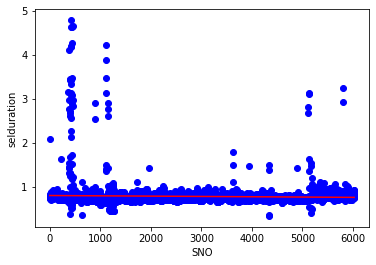

In [80]:
plt.scatter(train.SNO, train.selduration,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SNO")
plt.ylabel("selduration")

In [85]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SNO']])
test_y = np.asanyarray(test[['selduration']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.07
Residual sum of squares (MSE): 0.04
R2-score: -246.49


In [ ]:
#using polynomial regression

In [86]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SNO']])
train_y = np.asanyarray(train[['selduration']])

test_x = np.asanyarray(test[['SNO']])
test_y = np.asanyarray(test[['selduration']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000000e+00, 2.0000000e+00, 4.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01],
       ...,
       [1.0000000e+00, 6.0200000e+03, 3.6240400e+07],
       [1.0000000e+00, 6.0210000e+03, 3.6252441e+07],
       [1.0000000e+00, 6.0220000e+03, 3.6264484e+07]])

In [87]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -1.00482681e-04  1.55337666e-08]]
Intercept:  [0.89733586]


Text(0, 0.5, 'selduration')

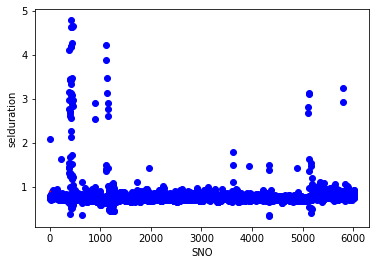

In [88]:
#plotting the polynomial regression
plt.scatter(train.SNO, train.selduration,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("SNO")
plt.ylabel("selduration")

In [89]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.07
Residual sum of squares (MSE): 0.04
R2-score: -17.70
